<a href="https://colab.research.google.com/github/hariskhan-hk/Churn_pred/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
from sklearn.metrics import mean_squared_error

In [3]:
tel_df= pd.read_csv("/content/sample_data/Cleaned_Telecom_Dataset_New.csv")
tel_df

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_No,Partner_Yes,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,0,29.85,29.85,0,0,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0
1,1,0,56.95,1889.50,0,1,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,2,0,53.85,108.15,1,1,1,0,0,0,...,0,0,0,1,1,0,0,0,0,0
3,3,0,42.30,1840.75,0,1,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
4,4,0,70.70,151.65,1,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,7038,0,84.80,1990.50,0,1,0,1,1,0,...,0,0,0,1,0,1,0,0,0,0
7028,7039,0,103.20,7362.90,0,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
7029,7040,0,29.60,346.45,0,0,0,1,1,1,...,0,0,1,0,1,0,0,0,0,0
7030,7041,1,74.40,306.60,1,1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0


In [4]:
tel_df= tel_df.drop("Unnamed: 0", axis= 1)
tel_df

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_No,Partner_Yes,Dependents_Yes,PhoneService_No,PhoneService_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,0,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,1,1,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,1,1,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,1,1,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,0,1,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,84.80,1990.50,0,1,0,1,1,0,1,...,0,0,0,1,0,1,0,0,0,0
7028,0,103.20,7362.90,0,0,0,1,1,0,1,...,0,1,0,0,0,0,0,0,0,1
7029,0,29.60,346.45,0,0,0,1,1,1,0,...,0,0,1,0,1,0,0,0,0,0
7030,1,74.40,306.60,1,1,0,1,0,0,1,...,0,0,0,1,1,0,0,0,0,0


# Feature Scaling

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [6]:
scaler.fit(tel_df.drop(['Churn'], axis = 1))
scaled_features = scaler.transform(tel_df.drop('Churn',axis = 1))

# Feature Selection

In [7]:
X= scaled_features
y= tel_df["Churn"]

#Logistic Regression with Python Package without Smote

## Train Test Split

In [8]:
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state= 44, test_size= 0.3)

In [9]:
lgmod= LogisticRegression(max_iter=1000000, solver='newton-cg')
lgmod.fit(X_train, y_train)

LogisticRegression(max_iter=1000000, solver='newton-cg')

In [10]:
y_pred= lgmod.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 1])

##Mean Square Error

In [11]:
mse = mean_squared_error(y_test, y_pred)
mse

0.2033175355450237

##Accuracy

In [12]:
score= lgmod.score(X_train, y_train)
print(f"The score of the Logistic Regression model is: {score}")

The score of the Logistic Regression model is: 0.8029256399837464


In [13]:
accuracy= accuracy_score(y_test, y_pred)
print(f"The accuracy of the Logistic Regression model is: {accuracy}")

The accuracy of the Logistic Regression model is: 0.7966824644549763


##Confusion Matrix With Visualization


Following is the Confusion Matrix for the Logistic Regression is: 
[[1379  155]
 [ 274  302]]


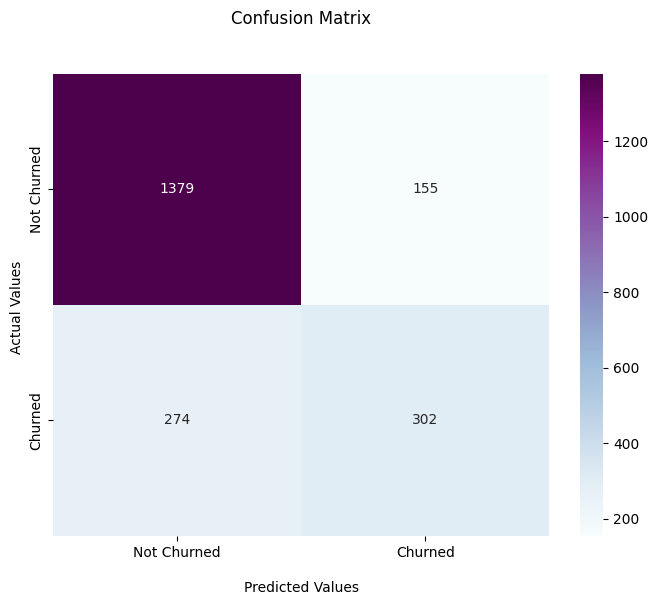

In [14]:
cm= confusion_matrix(y_test, y_pred)
print("Following is the Confusion Matrix for the Logistic Regression is: ")
print(cm)

plt.figure(figsize=(8, 6))

ax = sns.heatmap(cm, annot=True, cmap='BuPu', fmt='g')
ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Not Churned','Churned'])
ax.yaxis.set_ticklabels(['Not Churned','Churned'])

## Display the visualization of the Confusion Matrix.
plt.show()

##Classification Report

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1534
           1       0.66      0.52      0.58       576

    accuracy                           0.80      2110
   macro avg       0.75      0.71      0.73      2110
weighted avg       0.79      0.80      0.79      2110



#Logistic Regression With Python Package With SMOTE

In [16]:
sm = SMOTE(random_state=42)
sm = SMOTEENN(smote = sm)
X_resampled, y_resampled = sm.fit_resample(X,y)

## Train Test Split

In [17]:
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state = 42)

In [18]:
lgmod_smote= LogisticRegression(max_iter=10000, solver= 'liblinear')
lgmod_smote.fit(Xr_train, yr_train)
# , solver='newton-cg'

LogisticRegression(max_iter=10000, solver='liblinear')

In [19]:
yr_pred= lgmod_smote.predict(Xr_test)
yr_pred

array([0, 0, 1, ..., 0, 1, 0])

##Mean Sqaure Error

In [20]:
mse = mean_squared_error(yr_test, yr_pred)
mse

0.08697889861039629

##Accruracy

In [21]:
score= lgmod_smote.score(Xr_train, yr_train)

In [22]:
accuracy= accuracy_score(yr_test, yr_pred)
print(f"The accuracy of the Logistic Regression model is: {accuracy}")

The accuracy of the Logistic Regression model is: 0.9130211013896037


##Confusion Matrix With Visualization

The Confusion Matrix of the Logistic Regression with SMOTE is: [[ 764   88]
 [  81 1010]]


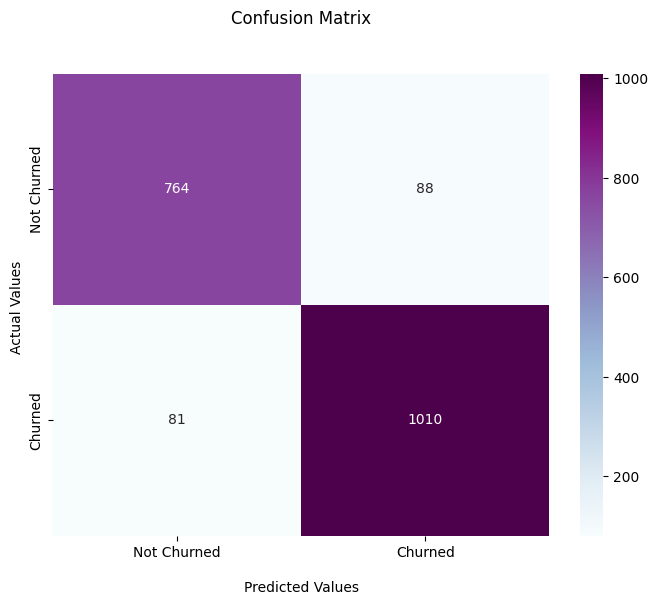

In [23]:
cm= confusion_matrix(yr_test, yr_pred)

print(f'The Confusion Matrix of the Logistic Regression with SMOTE is: {cm}')

plt.figure(figsize=(8, 6))

ax = sns.heatmap(cm, annot=True, cmap='BuPu', fmt='g')
ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Not Churned','Churned'])
ax.yaxis.set_ticklabels(['Not Churned','Churned'])

## Display the visualization of the Confusion Matrix.
plt.show()


##Classification Report

In [24]:
print(classification_report(yr_test, yr_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       852
           1       0.92      0.93      0.92      1091

    accuracy                           0.91      1943
   macro avg       0.91      0.91      0.91      1943
weighted avg       0.91      0.91      0.91      1943



#Logistic Regression without Python Package without SMOTE

We will apply the Logistic Regression by calculating the value of theta through Gradient Descent Method.

##Creating Logistic Regression Class using Numpy

In [25]:
# Importing necessary libraries
import numpy as np

# Logistic Regression class
class LogitRegression_Numpy:
    def __init__(self, learning_rate, iterations):
        self.learning_rate = learning_rate
        self.iterations = iterations

    # Function to train the model
    def fit(self, X, Y):
        # number of training examples and features
        self.m, self.n = X.shape
        # weight initialization
        self.W = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.Y = Y

        # gradient descent learning
        for i in range(self.iterations):
            self.update_weights()
        return self

    # Helper function to update weights using gradient descent
    def update_weights(self):
        A = 1 / (1 + np.exp(-(self.X.dot(self.W) + self.b)))

        # calculate gradients
        tmp = (A - self.Y.T)
        tmp = np.reshape(tmp, self.m)
        dW = np.dot(self.X.T, tmp) / self.m
        db = np.sum(tmp) / self.m

        # update weights
        self.W -= self.learning_rate * dW
        self.b -= self.learning_rate * db

    # Function to make predictions
    def predict(self, X):
        Z = 1 / (1 + np.exp(-(X.dot(self.W) + self.b)))
        Y = np.where(Z > 0.5, 1, 0)
        return Y


##Train Test Split

In [26]:

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
y_test = y_test.ravel()
X_train= np.array(X_train)
X_test= np.array(X_test)
y_train= np.array(y_train)
y_test= np.array(y_test)

# User input for iterations
iterations = 10000

# Model training
model = LogitRegression_Numpy(learning_rate=0.01, iterations=iterations)
model.fit(X_train, y_train)

# Prediction on test set
y_pred = model.predict(X_test)


##Accuracy and Other Performance Metrics

In [27]:
# Initialize counts
counts = {
    'TP': {0: 0, 1: 0},
    'FP': {0: 0, 1: 0},
    'TN': {0: 0, 1: 0},
    'FN': {0: 0, 1: 0}
}

# Count TP, FP, TN, and FN
for yt, yp in zip(y_test, y_pred):
    if yt == 1 and yp == 1:
        counts['TP'][1] += 1
    elif yt == 0 and yp == 0:
        counts['TP'][0] += 1
    elif yt == 0 and yp == 1:
        counts['FP'][1] += 1
        counts['FN'][0] += 1
    elif yt == 1 and yp == 0:
        counts['FP'][0] += 1
        counts['FN'][1] += 1

# Calculate Precision, Recall, and F1 Score for both classes
metrics = {
    'precision': {0: 0, 1: 0},
    'recall': {0: 0, 1: 0},
    'f1_score': {0: 0, 1: 0},
    'accuracy': 0
}

for cls in [0, 1]:
    TP = counts['TP'][cls]
    FP = counts['FP'][cls]
    FN = counts['FN'][cls]

    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    metrics['precision'][cls] = precision
    metrics['recall'][cls] = recall
    metrics['f1_score'][cls] = f1_score

# Calculate overall accuracy correctly
total_correct = sum(counts['TP'].values())
total_predictions = len(y_test)
metrics['accuracy'] = total_correct / total_predictions

print(f"Accuracy: {metrics['accuracy']:.2f}")
print(f"Precision for class 0: {metrics['precision'][0]:.2f}")
print(f"Recall for class 0: {metrics['recall'][0]:.2f}")
print(f"F1 Score for class 0: {metrics['f1_score'][0]:.2f}")
print(f"Precision for class 1: {metrics['precision'][1]:.2f}")
print(f"Recall for class 1: {metrics['recall'][1]:.2f}")
print(f"F1 Score for class 1: {metrics['f1_score'][1]:.2f}")


Accuracy: 0.80
Precision for class 0: 0.84
Recall for class 0: 0.91
F1 Score for class 0: 0.87
Precision for class 1: 0.65
Recall for class 1: 0.50
F1 Score for class 1: 0.57


Hence the accuracy of Logistics Regression with Python Package is 80% which is same as the one calculated for without Python Package model.

#Logistic Regression without Python Package without SMOTE

##Train Test Split

In [28]:
# Split dataset
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state = 42)
yr_test = yr_test.ravel()        #To change yr_test to 1-d array
Xr_train= np.array(Xr_train)
Xr_test= np.array(Xr_test)
yr_train= np.array(yr_train)
yr_test= np.array(yr_test)

# User input for iterations
iterations = 10000

# Model training
model = LogitRegression_Numpy(learning_rate=0.01, iterations=iterations)
model.fit(Xr_train, yr_train)

# Prediction on test set
yr_pred = model.predict(Xr_test)


##Accuracy and Other Performance Metrics

In [29]:
# Initialize counts
counts = {
    'TP': {0: 0, 1: 0},
    'FP': {0: 0, 1: 0},
    'TN': {0: 0, 1: 0},
    'FN': {0: 0, 1: 0}
}

# Count TP, FP, TN, and FN
for yt, yp in zip(yr_test, yr_pred):
    if yt == 1 and yp == 1:
        counts['TP'][1] += 1
    elif yt == 0 and yp == 0:
        counts['TP'][0] += 1
    elif yt == 0 and yp == 1:
        counts['FP'][1] += 1
        counts['FN'][0] += 1
    elif yt == 1 and yp == 0:
        counts['FP'][0] += 1
        counts['FN'][1] += 1

# Calculate Precision, Recall, and F1 Score for both classes
metrics = {
    'precision': {0: 0, 1: 0},
    'recall': {0: 0, 1: 0},
    'f1_score': {0: 0, 1: 0},
    'accuracy': 0
}

for cls in [0, 1]:
    TP = counts['TP'][cls]
    FP = counts['FP'][cls]
    FN = counts['FN'][cls]

    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    metrics['precision'][cls] = precision
    metrics['recall'][cls] = recall
    metrics['f1_score'][cls] = f1_score

# Calculate overall accuracy correctly
total_correct = sum(counts['TP'].values())
total_predictions = len(yr_test)
metrics['accuracy'] = total_correct / total_predictions

print(f"Accuracy: {metrics['accuracy']:.2f}")
print(f"Precision for class 0: {metrics['precision'][0]:.2f}")
print(f"Recall for class 0: {metrics['recall'][0]:.2f}")
print(f"F1 Score for class 0: {metrics['f1_score'][0]:.2f}")
print(f"Precision for class 1: {metrics['precision'][1]:.2f}")
print(f"Recall for class 1: {metrics['recall'][1]:.2f}")
print(f"F1 Score for class 1: {metrics['f1_score'][1]:.2f}")


Accuracy: 0.91
Precision for class 0: 0.90
Recall for class 0: 0.90
F1 Score for class 0: 0.90
Precision for class 1: 0.92
Recall for class 1: 0.93
F1 Score for class 1: 0.92


Hence the accuracy of Logistics Regression with Python Package is 90% which is same as the one calculated for without Python Package model.